In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy.stats import zscore
import seaborn as sns

In [2]:
#opened file and saved it as XLS to save i var
data1=pd.read_excel("CreditCardCustomerData.xls")

In [3]:
#let's see all of it
data1.head(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
data1.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
#let's see the variable. All numeric
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
#we won't need customer key nor SI_NO
data1=data1.drop(["Sl_No","Customer Key"], axis=1)

In [7]:
data1.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


#### there is some skew columns
#### let's visualize it

Avg_Credit_Limit


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


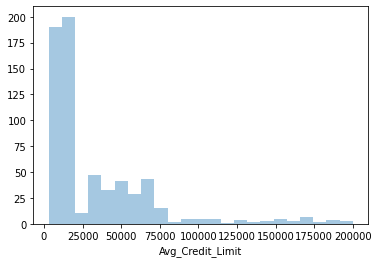

Total_Credit_Cards


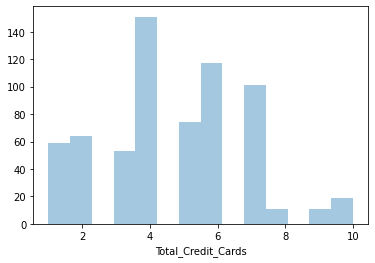

Total_visits_bank


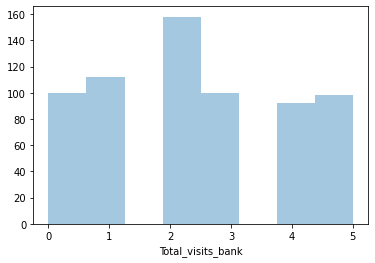

Total_visits_online


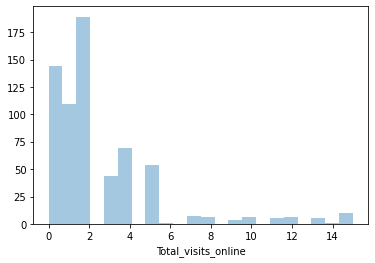

Total_calls_made


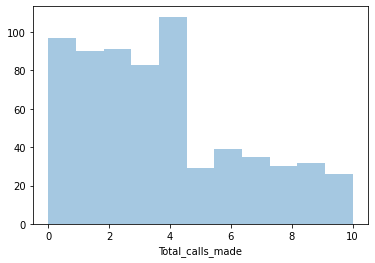

In [8]:
for i in list(data1.columns):
    print(i)
    sns.distplot(data1[i], kde=False)
    plt.show()

##### it seems like data could be divided in 4..let's see more
##### and avg credit limit is very skewed...seems to have outliers let's do a graph on it

Avg_Credit_Limit


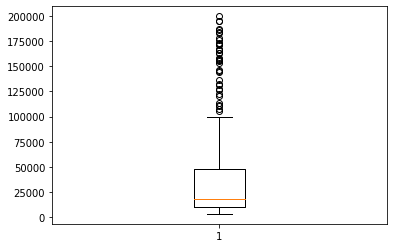

Total_Credit_Cards


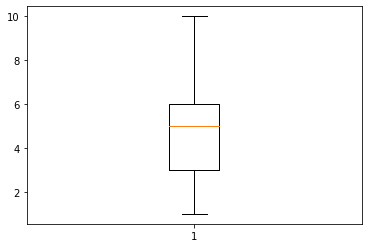

Total_visits_bank


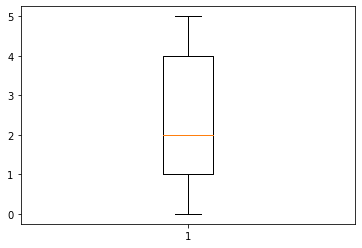

Total_visits_online


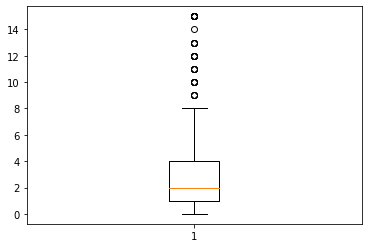

Total_calls_made


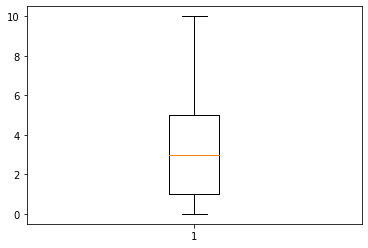

In [9]:
for i in list(data1.columns):
    print(i)
    plt.boxplot(data1[i])
    plt.show()
    

#### visits online also has outliers but avg credit limit has too many.
#### this will affect our model. 
####  I don't want to remove them...since our data since we rink loosing important date but we can try np.log :)

In [10]:
#For the future when we want to see the actual numbers I will save a specific df with the original numbers
realdata=data1.copy()
# Let us take logaritmic transform for visits online and credit limit to remove outliers
data1['Avg_Credit_Limit'] = np.log(data1['Avg_Credit_Limit'])
#data['Total_visits_online'] = np.log(data['Total_visits_online'])
# doing np.log to total visit online led to - infity so I will leave it as it is. 
#the outliers are not that many

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd7cbece9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd7cbece640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd7cbece850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd7cbe955e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd7cbe95e80>],
 'means': []}

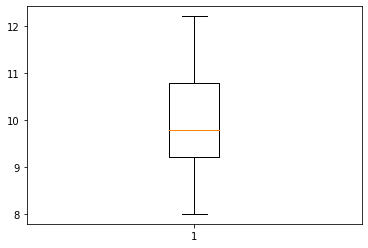

In [11]:
plt.boxplot(data1['Avg_Credit_Limit'])


In [12]:
#let's make sure it din't creat inf
data1[data1==-np.inf].count()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [13]:
data1[data1==np.inf].count()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### Prove that we got rid of the outliers 

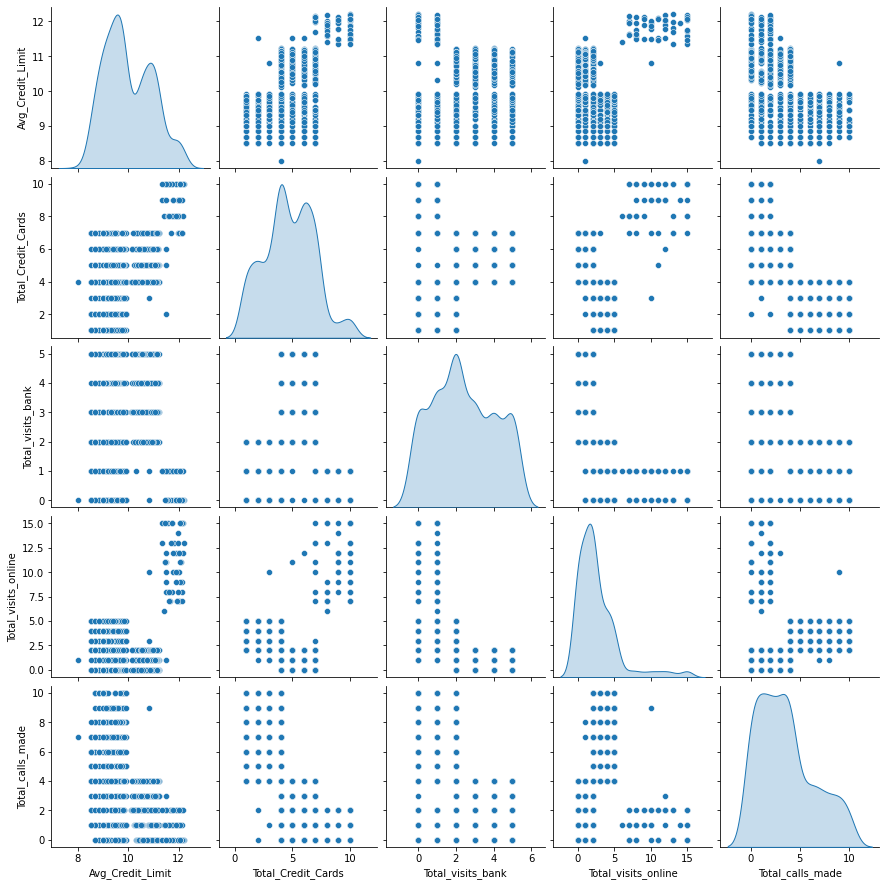

In [14]:
#Let us check for pair plots
sns.pairplot(data1,diag_kind='kde')

In [15]:
#Should I remove Total visit online.....
# Based on the above graph it seems like it could be cut in 4 cluster

### there data seems to be in 4 cluster
### there is no linearity and the data is skewed
### let's visualize if there is correlation between the columns

<AxesSubplot:>

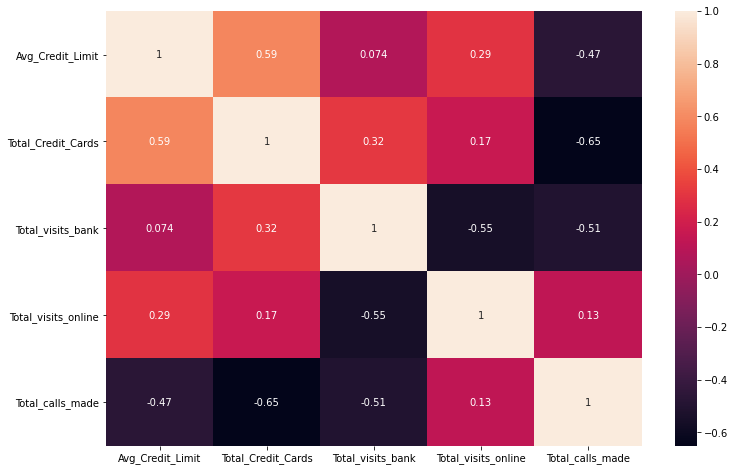

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data1.corr(), annot=True)

### Yep, we have  high correlation across the columns/variables.
    # For example avg creditlimit and calls mad has negative correlation
    # total credit cards and avg calls made has high correlation...
    # etc..so many
### We need to do PCA to help with this as correlation affects model results so let's do that before we do K means cluster and hierarchical clustering

In [17]:
#Let's standarize the data before we begin 
from scipy.stats import zscore
data=data1.apply(zscore)

In [18]:
data1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,11.512925,2,1,1,0
1,10.819778,3,0,10,9
2,10.819778,7,1,3,4
3,10.308953,5,1,1,4
4,11.512925,6,0,12,3


In [19]:
# we want to get rid of the correlation in order to have a better analysis
# which is why we begin the proces of PCA which is covariance metrics
#lets find the number of PCA components we should use

cov_matrix = np.cov(data.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00151745  0.587133    0.07404937  0.29342099 -0.46701602]
 [ 0.587133    1.00151745  0.31627526  0.16801286 -0.65223974]
 [ 0.07404937  0.31627526  1.00151745 -0.55269882 -0.50678371]
 [ 0.29342099  0.16801286 -0.55269882  1.00151745  0.12749255]
 [-0.46701602 -0.65223974 -0.50678371  0.12749255  1.00151745]]


In [20]:
# Now as learned, we do get the eigen values and the eigen vector
# through our week excersice we know that through linalg.eig we can get that info
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('PCA component/ Magnitude\n', eig_vecs)
print('\n Direction \n', eig_vals)
#the highest value is 2.29. its the best eig value. The highest contribution of the vector in term of variance


PCA component/ Magnitude
 [[-0.45190335 -0.39125188 -0.79466797  0.08353048 -0.06504464]
 [-0.55830362 -0.19956328  0.38911772  0.25769667  0.65624035]
 [-0.38912965  0.53834685  0.05548354  0.60369365 -0.43730578]
 [ 0.04578421 -0.71475457  0.39508865  0.2582044  -0.51406727]
 [ 0.57494553 -0.08003149 -0.240659    0.70391729  0.33108351]]

 Direction 
 [2.35509893 1.63960753 0.42153776 0.31945856 0.27188448]


In [21]:
#the percentage of var explained
#find the percentage of each the eig values by dividing each by total
var_exp = [( i /sum(eig_vals) ) * 100 for i in sorted(eig_vals, reverse=True)]

In [22]:
var_exp

[47.030611912797056,
 32.74246553032474,
 8.417981275178649,
 6.3794906171425305,
 5.429450664557025]

##### as mentioned earlier we can see the first one is the highest percentage
#### this also highlights that it cover 45%! that is a lot while the last 3 are only 6,5 ad 4%
#### seems like we can cut the line on the second as it covers most.... lets plot though

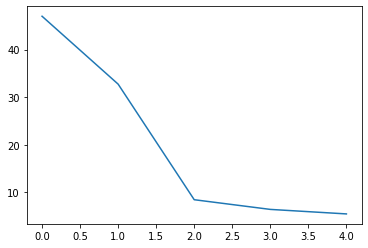

In [23]:
#we can see the huge jump down
plt.plot(var_exp)

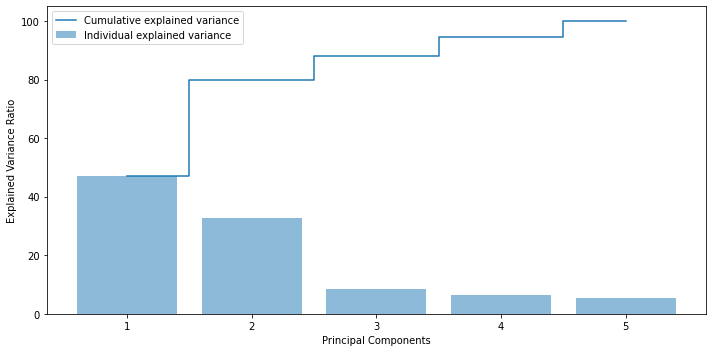

In [24]:
cum_var_exp = np.cumsum(var_exp)
# Ploting as used in our class notebooks which show great amount of data
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

##### perfect, we can see that most of the data can be covered with two.
#### elbow seems to 3 .

In [25]:
# NOw we run it with 3 PCA componets based on above to transform data
from sklearn.decomposition import PCA

# creating a dimensionality reduction from 5 to 3)

pca = PCA(n_components=3)
# pca.fit(data)
data_reduced = pca.fit_transform(data)
data_reduced.transpose()

array([[-0.4491769 ,  1.8161903 , -0.56669235, ..., -1.85041302,
        -2.55599813, -1.69049108],
       [ 0.36036573,  2.93557506,  1.12859355, ...,  3.0465654 ,
         4.73659815,  4.28716907],
       [-1.74463784, -0.55128444, -0.32123042, ...,  0.00915792,
         1.11469939,  0.3540871 ]])

In [26]:
#Creating a dataframe of the results (3 principal componetns with its numbers)
columns = ['pca_%i' % i for i in range(3)]
data_pca = pd.DataFrame(data=data_reduced, columns=columns, index=data.index)

data_pca = pd.DataFrame(pca.transform(data), columns=columns, index=data.index)
data_pca.head()

,pca_0,pca_1,pca_2
0,-0.449177,0.360366,-1.744638
1,1.816190,2.935575,-0.551284
2,-0.566692,1.128594,-0.321230
3,0.165706,0.242197,-0.513501
4,-0.467363,3.823063,0.169200


In [27]:
data_pca.shape
#yep it covers all of our data with the new perpedicula non correlated cols

(660, 3)

# This should have solved the correlation
# Let's run K means now

In [28]:
#We know it should be around 3 or 4 based on the graphs but lets see
#create a list of all clusters the diferent clusters
cluster_range=range(1,10)
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(data_pca)
    #sum of squared error for each cluster appended to our list
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2910.304938
1,2,1591.429915
2,3,703.656179
3,4,474.925670
4,5,419.849058
5,6,369.138824
6,7,343.525852
7,8,308.173335
8,9,280.908639


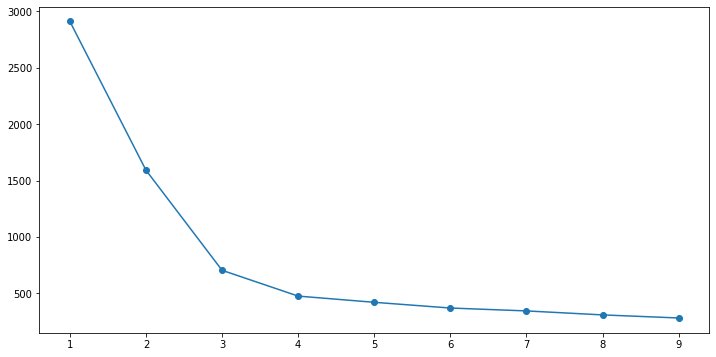

In [29]:
#lets use the list of clusters created to graph and find out the bend
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [30]:
#our bend is at 4 like we though :)
clusters = KMeans(n_clusters=3, n_init = 5, random_state=12345)
clusters.fit(data_pca)

KMeans(n_clusters=3, n_init=5, random_state=12345)

In [31]:
labels = clusters.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[385 225  50]


#### The last cluster as a lot less in it unlike the first two..but that is just based on the distance

In [32]:
# Let's create a data fame of the centroid
#to then compare with hierarchical 
centroids = clusters.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(data_pca) )
centroid_df.transpose()

,0,1,2
pca_0,-0.891239,1.940857,-1.871311
pca_1,-0.658895,0.308070,3.687174
pca_2,-0.039363,-0.027762,0.428024


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[kgroup]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[kgroup]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[kgroup]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[kgroup]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[kgroup]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

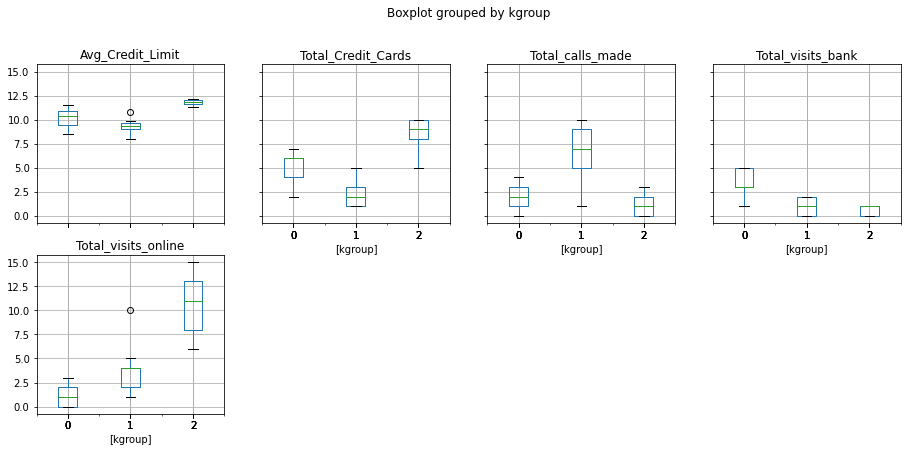

In [33]:
## time to predict the clusters!!!
predictions = clusters.predict(data_pca)
realdata['kgroup']=predictions

## having that I will add this our original data!
#let's add it to the actual data that wasn't standarize to check results data1!
kmean_dt=data1.copy()
kmean_dt["kgroup"] = predictions

#let's show the clustersss!!
kmean_dt.boxplot(by = 'kgroup',  layout=(3,4), figsize=(15, 10))


#### Ran it the first time thinking the elbow stated 4 but realized to move it to 3 based on these results:The clusters of average credit limit , total credit cards, toatal visit bank,and visits online, look well distributed. total calls made seems to have groups 1, 2 and 3 very close to each other...very little diference between the clusters.
#### now with these results I can say that all of the clusters withing each of the categories is well distributed. very well distributed and thus the  business should make 3 groups based on K means. Let's try hierarchical now

In [53]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data_pca, predictions)
print("The silhoutte_score is", score)

The silhoutte_score is 0.582948691323339


##### not a bad silhoutte score .6 average distance between clusters. based on box graphs we also show its not bad at all the distribution.

# Let's do hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff.

In [34]:
#### Lets create a linkage matrix using Ward and the PCA results since that will help remove the correlation within the cols of the data
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
Z = linkage(data, method='ward', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(data_pca))
print("The cophenetic  coefficient is ", c)


The cophenetic  coefficient is  0.7667471404809341


##### The cophenetic coefficient is close to 1..which is not a bad cluster ...let's see what the other methods give us

# Ward dendrogam

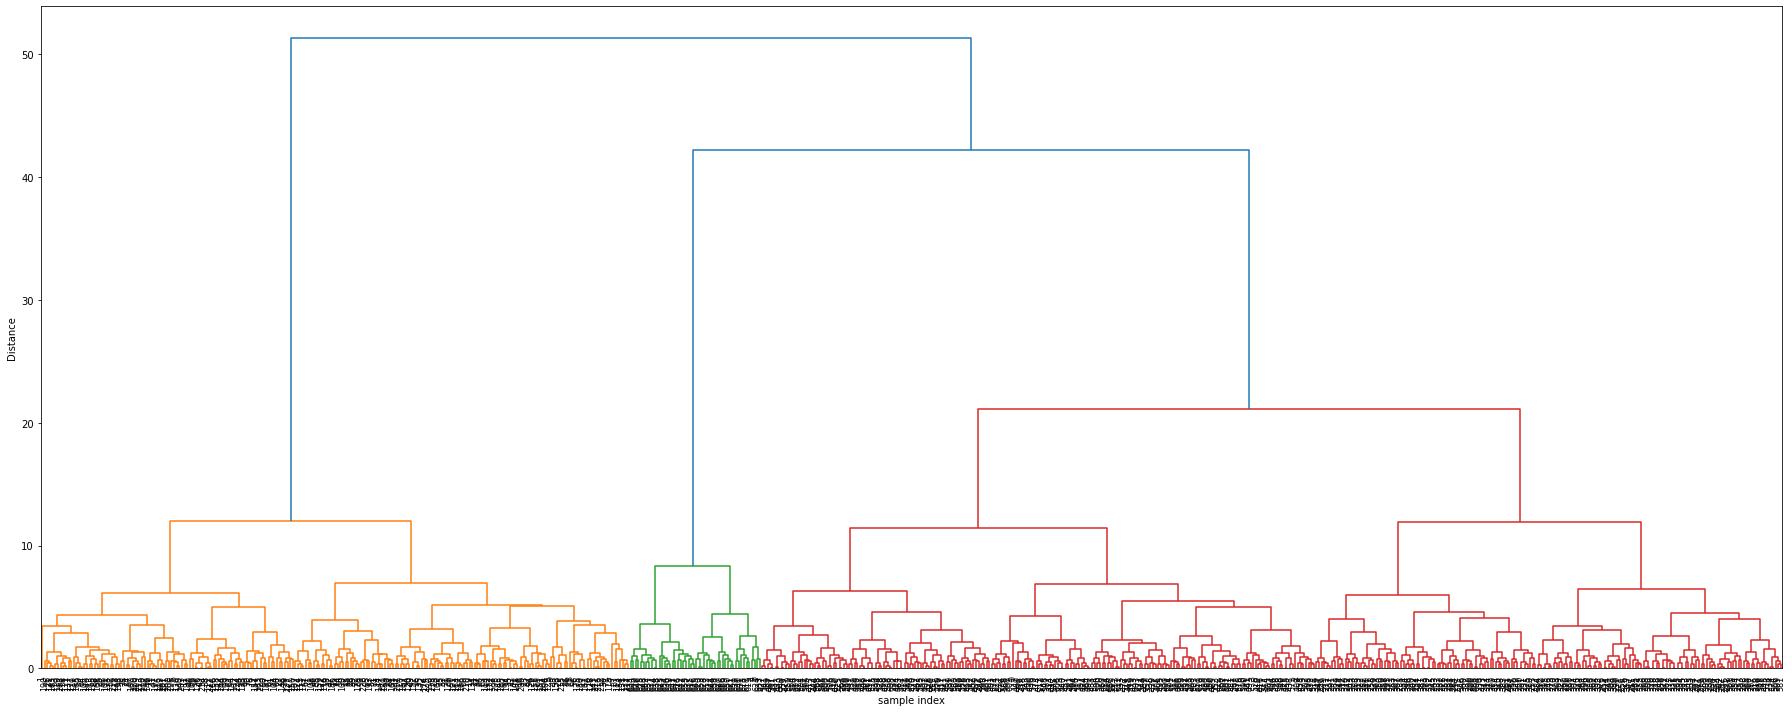

In [35]:
plt.figure(figsize=(25, 10))
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### This dendogram seems well distributed and I can see that at a distance of 30 I could cut the tree to have the three custers

In [36]:
#let's do average now
Z = linkage(data, method='average' ,metric='euclidean')
c, coph_dists = cophenet(Z , pdist(data_pca))

print("The cophenetic  coefficient is ", c)

The cophenetic  coefficient is  0.8783123371400883


#### this is a way better result based on the cophenetic index. The Euclidean distance and the dendogram distance of clusters is much closer.

# Average dendrogam

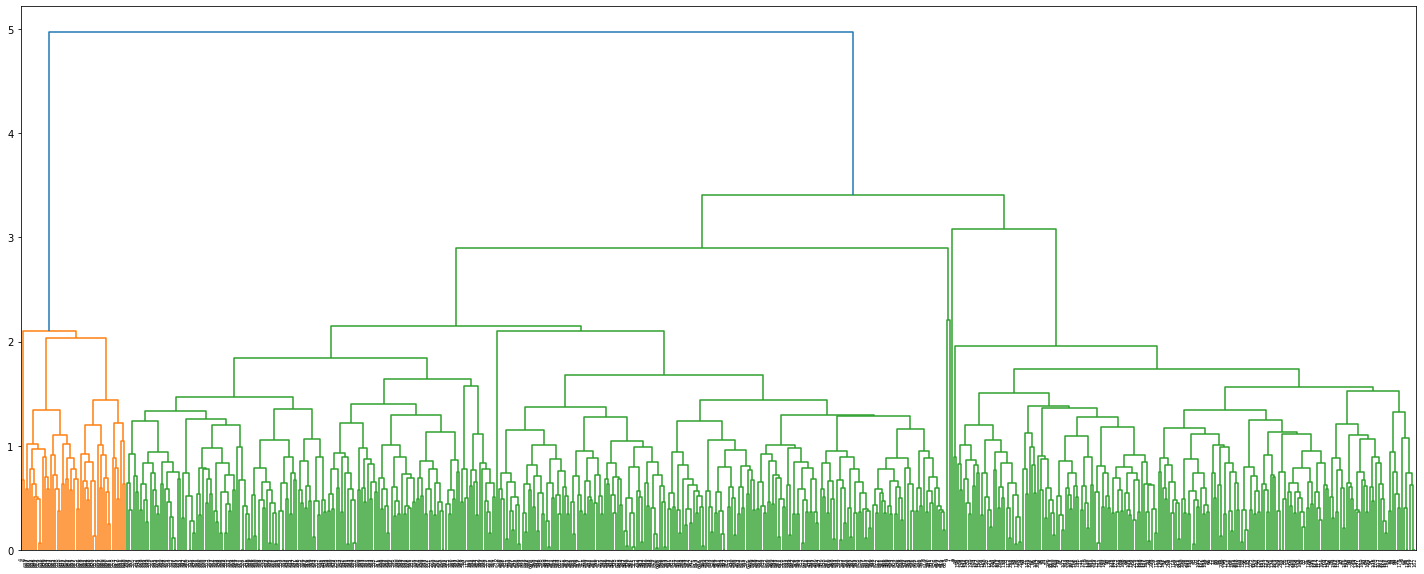

In [37]:
#let's plot it now
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

##### the distance created using avrage is small leading to graph that is very tall. the just of the dendogram is has somo diferences in the middle as the last one seem to have a small group in the middle one. this one has a bigger middle as much as the last group...

In [38]:
#Let's do complete now
Z = linkage(data, method='complete' ,metric='euclidean')
c, coph_dists = cophenet(Z , pdist(data_pca))

print("The cophenetic  coefficient is ", c)

The cophenetic  coefficient is  0.846237942818132


##### not as good as the Cophonetic coef when we used average on the last one but is better than ward

# Complete dendrogam 

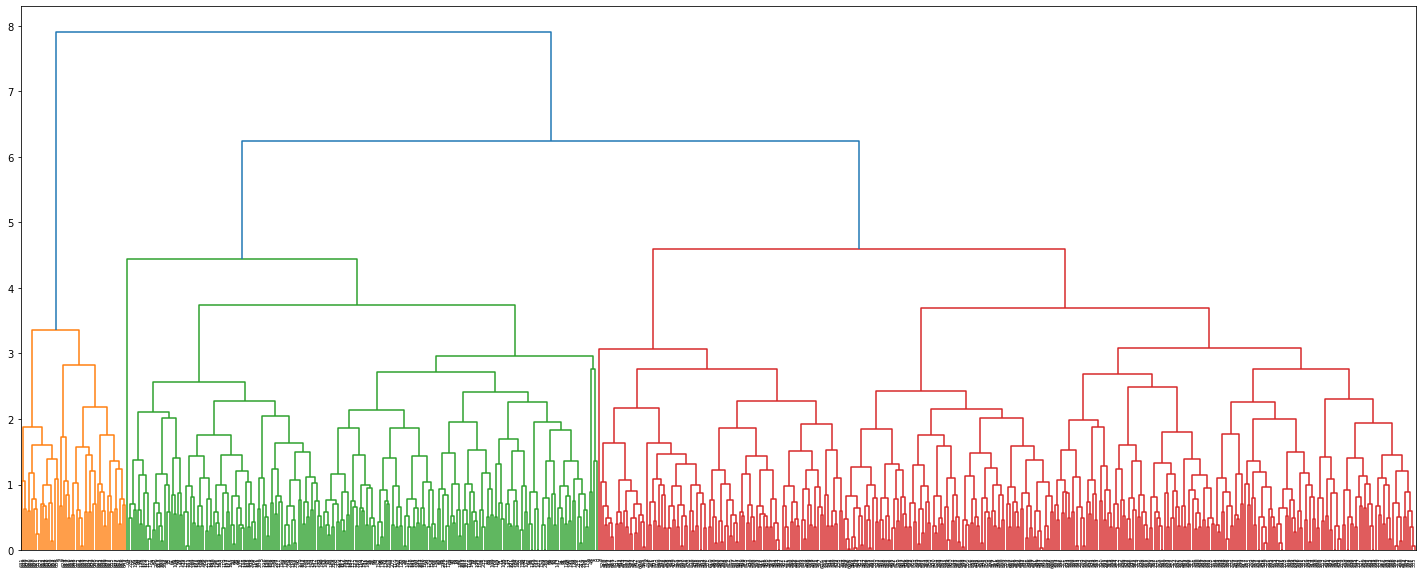

In [39]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

###### very similar to the one above using average which could explain its similar cophonetic score

# Now that we have viewed dendogram and tried diferent methods let's run the Aglomeratice Clustering within sklearn using the best method seen above avarage with .88 cophonetic coef . This will allow to get label tie them back to the data and compare between the two cluster methods (hierarchical and k-means)


In [41]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(data_pca)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [42]:
#let's also add it to the main data both Hierarchical and Kmeans results next to each other
#for visualization of group diferences
realdata["hgroup"]=model.labels_
#let's create a cierarchical data frame to append the cluster labels at the end 
# we will use this for plotting purpose instead for easier purpose for the mean time
hierarchical=data1.copy()
hierarchical["hgroup"]=model.labels_
hierarchical.head(10)



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,hgroup
0,11.512925,2,1,1,0,2
1,10.819778,3,0,10,9,0
2,10.819778,7,1,3,4,2
3,10.308953,5,1,1,4,2
4,11.512925,6,0,12,3,1
5,9.903488,3,0,1,8,0
6,11.512925,5,0,11,2,1
7,9.615805,3,0,1,1,0
8,8.517193,2,0,2,2,0
9,8.006368,4,0,1,7,0


In [55]:
score2 = silhouette_score(data_pca, model.labels_)
print("The silhoutte_score is", score2)

The silhoutte_score is 0.5827007109160436


#### Kmeans results show a very tiny better results with its 4th decial decial (0.582948691323339). Both show to be as good, not much diference.

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[hgroup]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[hgroup]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[hgroup]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[hgroup]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[hgroup]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

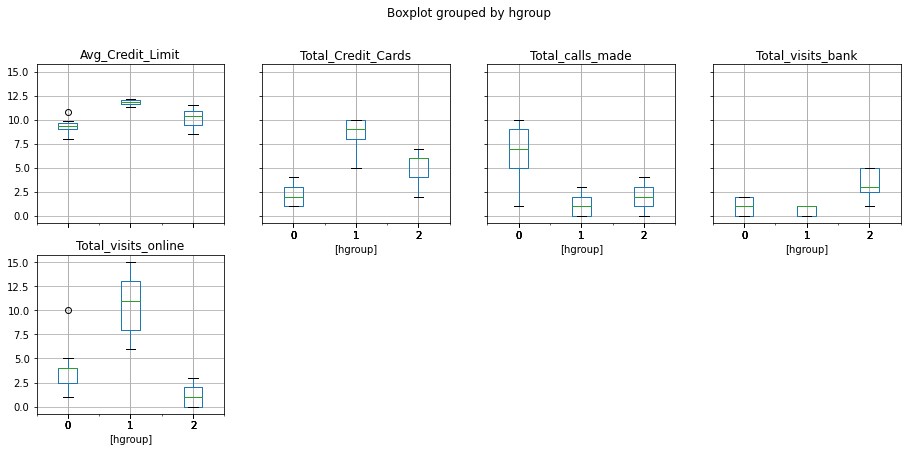

In [43]:
# Visualize the centers of the clusters created by hierarchical clustering
hierarchical.boxplot(by = 'hgroup',  layout=(3,4), figsize=(15, 10))

#### The groups created by the hierarchical clusters are well distributed. I see that total visits to the bank does has very close clusters between 0 and 1, but they are still diferent. I can see 1 outlier on avg credit limit and total visit online on group 0 which is not too bad. there is good distribution amongs all with some skeness due to its nature of the data which is ofc sometimes leans to one side or the other. the skweness is very little though on very few groups like total visit bank 2 and little on avg creidt limit group 3

######## Since we have this box plot lets print again the one created with kmeans to see the diference back to back

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[kgroup]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[kgroup]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[kgroup]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[kgroup]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[kgroup]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

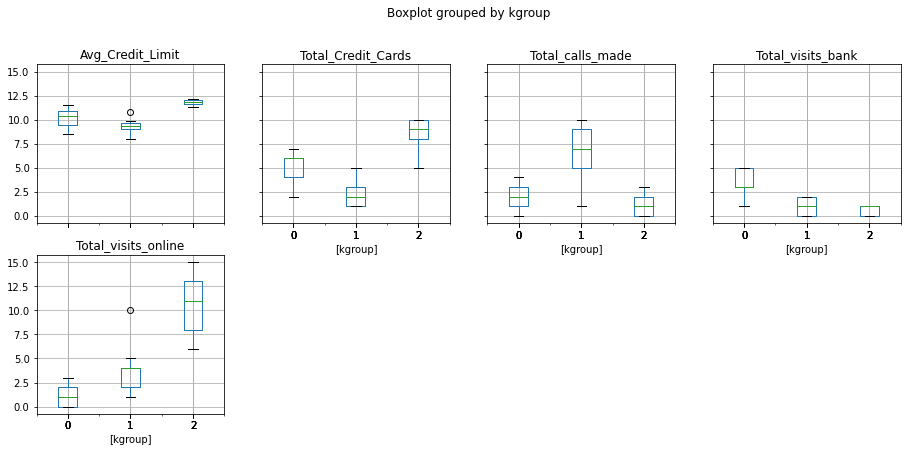

In [44]:
# Let's visualize the centers of kmeans again 
kmean_dt.boxplot(by = 'kgroup',  layout=(3,4), figsize=(15, 10))

### the 0 group with kmeans is larger than that with hierarchical on avg credit limit we can look into it deper in a little with avg group of each and such
### There is less of group 1 on total credit cards on kmeans than there is with hierarchical the other two group 1 and 2 follow the same as with hierarchical 0 having less than 2.
### In total calls there ieems to be a better distribution with kmeans as the three group are in diferent ranges. Group 1 in kmeans is as large as group 0 on hierarchical cluster.
### total vist bank 1 and 2 are the close/similar clusters and in hierarchical we have groups 0 and 1 very close/similar
### the last one we have cluster 0 and 1 flipped.
#### Wonder if group 1 in kmeans is equivalent to 0 in hierarachical clusters solution acrosss the board

##### let's look into it deper by analysing and comparing the results

In [47]:
realdata.head(20)
realdata.iloc[:,-2:]

,kgroup,hgroup
0,0,2
1,1,0
2,0,2
3,0,2
4,2,1
...,...,...
655,2,1
656,2,1
657,2,1
658,2,1


# wowwww the groups are the same they are described with diferent numbers. Unlike explained above withbox plots. Having this graph I was able to see that both methods ended up grouping the same 
# watching this I can see that hierarchical group 0 is equivalent to kmeans group 1. 
# we can see that hierarchical group a is equivalent to kmeans group 2
# we can see that hierarchical group 2 is equivalent to kmeans group 0

In [48]:
kmeansclus=kmean_dt.groupby(["kgroup"])
kmeansclus.mean()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
kgroup,,,,,
0,10.155951,5.516883,3.493506,0.979221,1.994805
1,9.316085,2.422222,0.937778,3.546667,6.857778
2,11.825513,8.740000,0.600000,10.900000,1.080000


In [49]:
hieraclus=hierarchical.groupby(["hgroup"])
hieraclus.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
hgroup,,,,,
0,9.320232,2.403587,0.928251,3.560538,6.883408
1,11.825513,8.740000,0.600000,10.900000,1.080000
2,10.149221,5.511628,3.485788,0.984496,2.005168


#### having that inmind we can see how the numbers are very similar to each other when matching the groups. example, group 0 in kmeans equals to very similar avg numbers in 2 group in hierarchical

#### Let's see now the actual numbers with the real data to give business an average of what their groups should be and have

In [50]:
realdata.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,kgroup,hgroup
0,100000,2,1,1,0,0,2
1,50000,3,0,10,9,1,0
2,50000,7,1,3,4,0,2
3,30000,5,1,1,4,0,2
4,100000,6,0,12,3,2,1


###### Now that we know that both have the same groups for analysing purpose to tell the business what range whould each of the groups be we will remove kgroup column to get average

In [51]:
realdata=realdata.drop("kgroup", axis=1)
realdata=realdata.groupby(["hgroup"])
realdata.mean()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
hgroup,,,,,
0,12197.309417,2.403587,0.928251,3.560538,6.883408
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,33713.178295,5.511628,3.485788,0.984496,2.005168


# Now we can tell the business that they need to divide into 3 groups.

## GROUP 1: should have around lowest average around 12197 in Avg_Credit_Limit, low total average Total_Credit_Cards around 2 or 3, low Total_visits_bank average of around 1 visit, not much Total_visits_online with an average of 3.5 and a high Total_calls_made of total average of 6 -7 calls. <- might be adults. who know online and the results for online but also don't mind calling and have the middle avg_credit limit since they have used it for house and such..just assumptions..but I would dedice that 

## Group 2:  should have a very high average around 141040 in Avg_Credit_Limit, the highest total average Total_Credit_Cards around 8- 9, the lowest Total_visits_bank average of around .6 visit and highest vTotal_visits_online with an average of 11. and a low Total_calls_made of total average of 1 calls.  <- these peopel seem to be like the young but professional generation, with the highest everything for the exeption of calls and visits to bank which means they like doing things online

## Group 3: should have around mid average around 33713 in Avg_Credit_Limit, mid total average Total_Credit_Cards around 5 , high Total_visits_bank average of around 3 visit, lowest Total_visits_online with an average of .9  and low mid Total_calls_made of total average of 2 calls. <- they seem to be like the old generation with mid avg credit as they have spent it a high amount of credit card to not too high, they are ok with going to the bank their main source of info, they don't really use online and make calls sometimes. 



##### Not sure what services on the back poorly means in the assignment. If this is refering to the costumer service it is important to fix that as it is very important to group 0 they use calls and visits online. so if they get the service through each of these methods and it isn't good they won't be as drawn into the bank. Calls are seem to be the most important compared to the others.

##### For group 1 provide financial infomration on how to use cards and such as they are somewhat the most risky providing good service and process for they loans and discounts would seem to work. they mostly use online info so mostlikely won't care much about the interaciton with how people respond and such. Provide the information online.

###### For three they are average in most compared to the rest but they seem to really like going to the bank so improve the service person to person. Train the people at the bank to have the most information, be helpful and basically for it to be a good expericience for the customer